In [1]:
from src.io.datasets import CSVReader
from src.config.settings import get_settings
from src.config.training_settings import get_training_settings

In [2]:
settings = get_settings()
training_settings = get_training_settings()

reader = CSVReader()

In [3]:
train_file = training_settings.TRAIN_FILE
test_file = training_settings.TEST_FILE

train_data = reader.read(train_file)
test_data = reader.read(test_file)

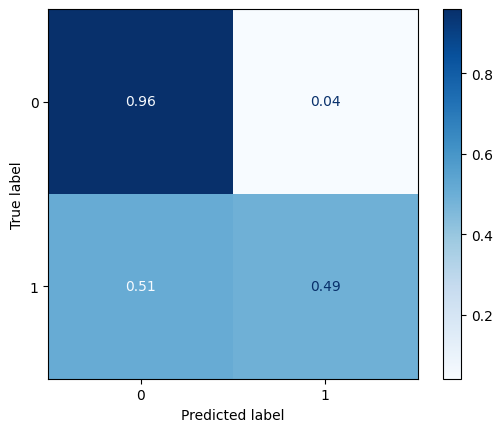

In [4]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

features = training_settings.ALL_FEATURES
target = training_settings.TARGET

X_train, y_train = train_data[features], train_data[target]
y_train = y_train.fillna(0)
X_test, y_test = test_data[features], test_data[target]
y_test = y_test.fillna(0)

negative_class_count = np.bincount(y_train.astype(int))[0]
positive_class_count = np.bincount(y_train.astype(int))[1]
scale_pos_weight = (negative_class_count / positive_class_count)

# Train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=model.classes_)
cm_display.plot(cmap="Blues", values_format=".2f")

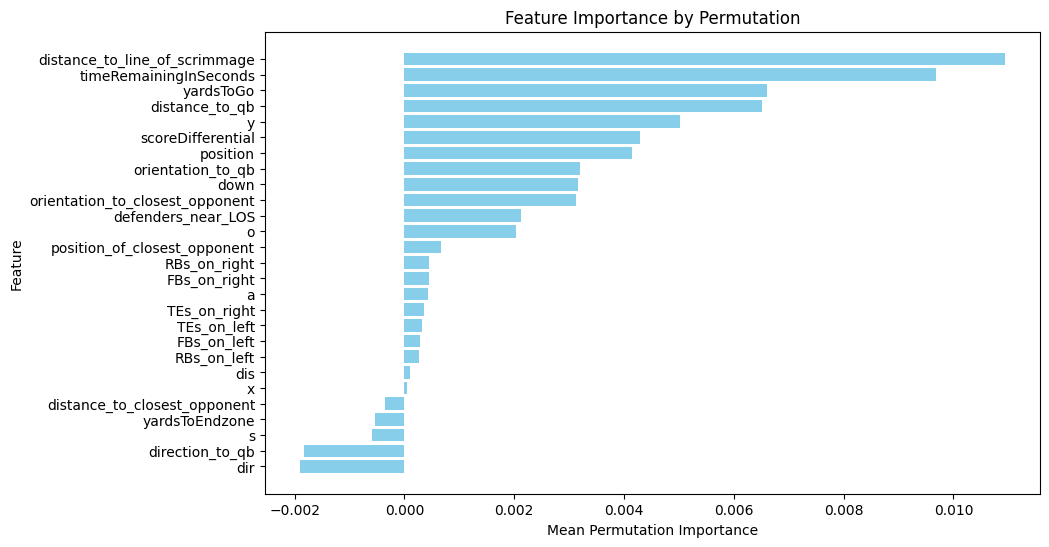

In [5]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(
    model, X_train, y_train, scoring="accuracy", n_repeats=10, random_state=42
)

sorted_idx = result.importances_mean.argsort()[::-1]
sorted_features = [features[i] for i in sorted_idx]
importances = result.importances_mean[sorted_idx]

# Display feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, importances, color="skyblue")
plt.xlabel("Mean Permutation Importance")
plt.ylabel("Feature")
plt.title("Feature Importance by Permutation")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

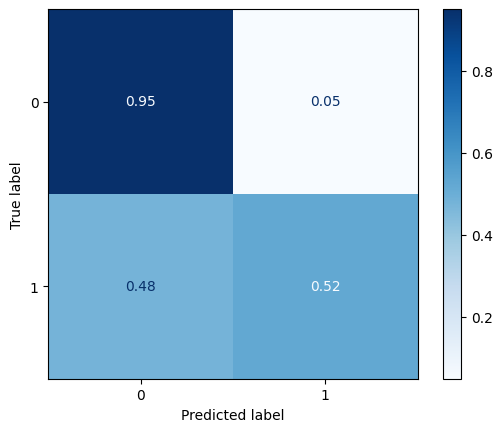

In [32]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

features = ['distance_to_line_of_scrimmage',
    'timeRemainingInSeconds',
    'yardsToGo',
    'distance_to_qb',
    'y',
    'scoreDifferential',
    'position',
    'orientation_to_qb',
    'down',
    'orientation_to_closest_opponent',
    'defenders_near_LOS',
    'o',
    'position_of_closest_opponent',
    'RBs_on_right',
    'FBs_on_right',
    'a',
    'TEs_on_right',
    'TEs_on_left',
    'FBs_on_left',
    'RBs_on_left',
    'dis',
    'x',
    # 'distance_to_closest_opponent',
    # 'yardsToEndzone',
    # 's',
    # 'direction_to_qb',
    # 'dir'
]
target = training_settings.TARGET

X_train, y_train = train_data[features], train_data[target]
y_train = y_train.fillna(0)
X_test, y_test = test_data[features], test_data[target]
y_test = y_test.fillna(0)

negative_class_count = np.bincount(y_train.astype(int))[0]
positive_class_count = np.bincount(y_train.astype(int))[1]
scale_pos_weight = (negative_class_count / positive_class_count)

# Train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=model.classes_)
cm_display.plot(cmap="Blues", values_format=".2f")